# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Jahval Romiz Septrada
- **Email:** jahvalromizseptrada@gmail.com
- **ID Dicoding:** Jahval Romiz Septrada

## Menentukan Pertanyaan Bisnis

- Produk apa yang paling banyak dan paling sedikit terjual?
- Kapan terakhir pelanggan melakukan transaksi?
- Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

## Import Semua Packages/Library yang Digunakan

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [58]:
# Dataset Customers
customers_df = pd.read_csv('data/customers_dataset.csv')
customers_df.head(4)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP


In [59]:
# Dataset Geolocation
geolocation_df = pd.read_csv('data/geolocation_dataset.csv')
geolocation_df.head(4)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP


In [60]:
# Dataset Order Items
order_items_df = pd.read_csv('data/order_items_dataset.csv')
order_items_df.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [61]:
# Dataset Order Payments
order_payments_df = pd.read_csv('data/order_payments_dataset.csv')
order_payments_df.head(4)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78


In [62]:
# Dataset Order Reviews
order_reviews_df = pd.read_csv('data/order_reviews_dataset.csv')
order_reviews_df.head(4)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06


In [63]:
# Dataset Orders
orders_df = pd.read_csv('data/orders_dataset.csv')
orders_df.head(4)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00


In [64]:
# Dataset Products
products_df = pd.read_csv('data/products_dataset.csv')
products_df.head(4)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0


In [65]:
product_category_name_translation_df = pd.read_csv('data/product_category_name_translation.csv')
product_category_name_translation_df.head(4)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table


In [66]:
# Mengubah nilai kolom nama produk menjadi bahasa inggris
products_main_df = products_df.merge(product_category_name_translation_df, 
                            left_on='product_category_name', 
                            right_on='product_category_name', 
                            how='left')
products_main_df.head(4)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby


In [67]:
products_main_df['product_category_name'] = products_main_df['product_category_name_english']
products_main_df.drop(columns='product_category_name_english', inplace=True)
products_main_df.head(4)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0


In [68]:
# Dataset Sellers
sellers_df = pd.read_csv('data/sellers_dataset.csv')
sellers_df.head(4)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP


**Insight:**
- Dataset yang akan digunakan dalam menjawab pertanyaan analisis adalah dataset Customers, Order Items, Orders, dan Products
- Dalam dataset Products dilakukan merge dan penggantian nilai dengan dataset Product Category Name agar mengubah nilai dari nama produk yang awalnya bahasa Brazil ke bahasa Inggris agar lebih mudah dipahamii

### Assessing Data

In [69]:
# Assesing Data Customers
customers_df.info()
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Jumlah duplikasi:  0


In [70]:
# Assesing Data Geolocation
geolocation_df.info()
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
Jumlah duplikasi:  261831


In [71]:
# Assesing Data Order items
order_items_df.info()
print("Jumlah duplikasi: ",order_items_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
Jumlah duplikasi:  0


In [72]:
order_items_df.describe() #menggunakan function describe karena terdapat kolom yang memiliki makna besaran / ukuran

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [73]:
# Assesing Data Order Payments
order_payments_df.info()
print("Jumlah duplikasi: ",order_payments_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
Jumlah duplikasi:  0


In [74]:
# Assesing Data Order Reviews
order_reviews_df.info()
print("Jumlah duplikasi: ",order_reviews_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
Jumlah duplikasi:  0


In [75]:
# Assesing Data Orders
orders_df.info()
print("Jumlah duplikasi: ",orders_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
Jumlah duplikasi:  0


In [76]:
orders_df.isna().sum()


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [77]:
# Assesing Data Products
products_main_df.info()
print("Jumlah duplikasi: ",products_main_df.duplicated().sum())
products_main_df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
Jumlah duplikasi:  0


product_id                      0
product_category_name         623
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [78]:
# Assesing Data Sellers
sellers_df.info()
print("Jumlah duplikasi: ",sellers_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
Jumlah duplikasi:  0


**Insight:**
- Terdapat Dataset yang memiliki Missing Values yang berpengaruh pada analisis yakni pada Dataset Orders dan Products 
- Walaupun dalam Dataset Geolocation dan Order Reviews terdapat Duplikasi dan Missing Value, hal tersebut menurut saya tidak mempengaruhi hasil analisis karena: 1. Tidak digunakan untuk menjawab pertanyaan analisis, 2. Duplikasi pada geolocation tidak merepresentasi nilai duplikat karena kesalahan input, melainkan nilai yang sama untuk mengkategorikan suatu lokasi, dan untuk Missing Value pada Order Reviews tidak dianggap kesalahan karena terdapat customers yang tidak menambahkan komentar ulasan. Walaupun hal tersebut bisa dilakukan pemberian pada null dengan "No Reviews".
- Ada fitur yang harus diubah tipe datanya yakni fitur yang berkaitan dengan tanggal dalam dataset Orders menjadi DateTime

### Cleaning Data

In [79]:
# Cleaning Dataset Orders
## Kolom order_approved_at
orders_df.order_approved_at.value_counts()

order_approved_at
2018-02-27 04:31:10    9
2017-12-05 10:30:42    7
2018-02-06 05:31:52    7
2017-11-07 07:30:38    7
2017-11-07 07:30:29    7
                      ..
2017-10-02 08:56:53    1
2017-06-08 02:45:24    1
2017-07-05 17:43:48    1
2018-05-25 17:15:21    1
2017-07-09 22:10:13    1
Name: count, Length: 90733, dtype: int64

In [80]:
orders_df.order_approved_at.fillna(value="2018-02-27 04:31:10", inplace=True) # Isi null dengan jumlah tanggal terbanyak

C:\Users\embez\AppData\Local\Temp\ipykernel_17820\2401781756.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_df.order_approved_at.fillna(value="2018-02-27 04:31:10", inplace=True) # Isi null dengan jumlah tanggal terbanyak


In [81]:
## Kolom order_delivered_carrier_date
orders_df.order_delivered_carrier_date.value_counts()

order_delivered_carrier_date
2018-05-09 15:48:00    47
2018-05-10 18:29:00    32
2018-05-07 12:31:00    21
2018-05-02 15:15:00    16
2018-07-24 16:07:00    16
                       ..
2017-08-18 16:42:51     1
2017-12-05 20:58:57     1
2017-10-03 20:26:19     1
2017-06-08 14:03:29     1
2018-03-09 22:11:59     1
Name: count, Length: 81018, dtype: int64

In [82]:
orders_df.order_delivered_carrier_date.fillna(value="2018-05-09 15:48:00", inplace=True)

C:\Users\embez\AppData\Local\Temp\ipykernel_17820\3183874194.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_df.order_delivered_carrier_date.fillna(value="2018-05-09 15:48:00", inplace=True)


In [83]:
## Kolom order_delivered_customer_date
orders_df.order_delivered_customer_date.value_counts()

order_delivered_customer_date
2018-05-08 19:36:48    3
2018-05-14 20:02:44    3
2018-05-08 23:38:46    3
2016-10-27 17:32:07    3
2018-07-24 21:36:42    3
                      ..
2017-10-06 16:58:25    1
2017-06-19 19:19:30    1
2017-07-19 22:10:03    1
2018-06-04 23:54:32    1
2017-11-21 17:06:59    1
Name: count, Length: 95664, dtype: int64

In [84]:
orders_df.order_delivered_customer_date.fillna(value="2018-05-08 19:36:48", inplace=True)

C:\Users\embez\AppData\Local\Temp\ipykernel_17820\2130771426.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_df.order_delivered_customer_date.fillna(value="2018-05-08 19:36:48", inplace=True)


In [85]:
orders_df.isna().sum() # Mengecek lagi apakah ada lagi nilai yang Null

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [86]:
## Ubah tipe data kolom yang bertipe Datetime
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
 
for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [87]:
# Cleaning Data Products
## Data Kontinu Products
products_main_df.product_name_lenght.fillna(value=products_main_df.product_name_lenght.mean(), inplace=True)
products_main_df.product_description_lenght.fillna(value=products_main_df.product_description_lenght.mean(), inplace=True)
products_main_df.product_photos_qty.fillna(value=products_main_df.product_photos_qty.mean(), inplace=True)
products_main_df.product_weight_g.fillna(value=products_main_df.product_weight_g.mean(), inplace=True)
products_main_df.product_length_cm.fillna(value=products_main_df.product_length_cm.mean(), inplace=True)
products_main_df.product_height_cm.fillna(value=products_main_df.product_height_cm.mean(), inplace=True)
products_main_df.product_width_cm.fillna(value=products_main_df.product_width_cm.mean(), inplace=True)
products_main_df.isna().sum()

C:\Users\embez\AppData\Local\Temp\ipykernel_17820\2949008704.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_main_df.product_name_lenght.fillna(value=products_main_df.product_name_lenght.mean(), inplace=True)
C:\Users\embez\AppData\Local\Temp\ipykernel_17820\2949008704.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on wh

product_id                      0
product_category_name         623
product_name_lenght             0
product_description_lenght      0
product_photos_qty              0
product_weight_g                0
product_length_cm               0
product_height_cm               0
product_width_cm                0
dtype: int64

In [88]:
# Data Kategoris Products
products_main_df.product_category_name.value_counts()

product_category_name
bed_bath_table               3029
sports_leisure               2867
furniture_decor              2657
health_beauty                2444
housewares                   2335
                             ... 
tablets_printing_image          9
fashion_childrens_clothes       5
home_comfort_2                  5
security_and_services           2
cds_dvds_musicals               1
Name: count, Length: 71, dtype: int64

In [89]:
products_main_df.product_category_name.fillna(value='bed-bath-table', inplace=True)
products_main_df.isna().sum()

C:\Users\embez\AppData\Local\Temp\ipykernel_17820\4116443691.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_main_df.product_category_name.fillna(value='bed-bath-table', inplace=True)


product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

**Insight:**
- Dataset yang kini sudah dilakukan pembersihan dengan mengisi nilai null dengan modus sehingga bisa dilakukan ke tahap EDA tanpa masalah
- Tipe data pada kolom tanggal di Dataset Orders yang telah dikonversi menjadi DateTime sehingga bisa dilakukan operasi pada nilai bertipe datetime di analisis selanjutnya

## Exploratory Data Analysis (EDA)

### Explore ...

In [90]:
# Eksplorasi Data Customers
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
agisse                1
vieiras               1
bertopolis            1
abadiania             1
xexeu                 1
Name: customer_id, Length: 4119, dtype: int64

In [91]:
# Eksplorasi Data Order Items
order_items_df.groupby(by="product_id").order_id.nunique().sort_values(ascending=False)

product_id
99a4788cb24856965c36a24e339b6058    467
aca2eb7d00ea1a7b8ebd4e68314663af    431
422879e10f46682990de24d770e7f83d    352
d1c427060a0f73f6b889a5c7c61f2ac4    323
389d119b48cf3043d311335e499d9c6b    311
                                   ... 
fff28f91211774864a1000f918ed00cc      1
fff1059cd247279f3726b7696c66e44e      1
ffeb228c521d5464d1f71444da96c446      1
ffe9468f4d890db80b7231e86931ff37      1
ffdde3d63e889c9a9f9ec30d82a4c815      1
Name: order_id, Length: 32951, dtype: int64

In [92]:
# Join table order_items dan products untuk menampilkan nama kategori produk penjualan terbanyak
order_items_products_df = pd.merge(
    left=order_items_df,
    right=products_main_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
order_items_products_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [93]:
# Pembelian terbanyak kategori produk
order_items_products_df.groupby(by="product_category_name").agg({
    "order_id": "nunique",
    "price": "sum"
}).sort_values(by="order_id", ascending=False)

,order_id,price
product_category_name,,
bed_bath_table,9417,1036988.68
health_beauty,8836,1258681.34
sports_leisure,7720,988048.97
computers_accessories,6689,911954.32
furniture_decor,6449,729762.49
...,...,...
arts_and_craftmanship,23,1814.01
la_cuisine,13,2054.99
cds_dvds_musicals,12,730.00


In [94]:
# Pembelian terdikit kategori produk
order_items_products_df.groupby(by="product_category_name").agg({
    "order_id": "nunique",
    "price": "sum"
}).sort_values(by="order_id", ascending=True)

,order_id,price
product_category_name,,
security_and_services,2,283.29
fashion_childrens_clothes,8,569.85
cds_dvds_musicals,12,730.00
la_cuisine,13,2054.99
arts_and_craftmanship,23,1814.01
...,...,...
furniture_decor,6449,729762.49
computers_accessories,6689,911954.32
sports_leisure,7720,988048.97


In [95]:
# Eksplorasi Data Order Payments
order_payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

In [96]:
# Eksplorasi Data Order Reviews
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [97]:
# Eksplorasi Data Orders
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

estimated_delivery_time = orders_df["order_estimated_delivery_date"] - orders_df["order_purchase_timestamp"]
estimated_delivery_time = estimated_delivery_time.apply(lambda x: x.total_seconds())
orders_df["estimated_delivery_time"] = round(estimated_delivery_time/86400)

orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,estimated_delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,16.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,27.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,26.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,12.0


In [98]:
# Eksplorasi Data Products
## Mengurutkan kategori produk dengan foto terbanyak
products_main_df.sort_values(by="product_photos_qty", ascending=False)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
9022,f95d5d21561ea085ba1e1a4e53840844,toys,62.0,679.0,20.0,8900.0,32.0,49.0,34.0
19056,234495ab7809d4517bc1330c439da1bb,baby,63.0,659.0,19.0,8900.0,32.0,49.0,34.0
28073,b659034bc6cfc3d9baeda101c0c281fe,pet_shop,54.0,802.0,18.0,9500.0,33.0,30.0,44.0
17843,e9880042522806f124fdd4f8c8514d0d,pet_shop,54.0,830.0,18.0,2600.0,33.0,30.0,44.0
2196,7f38cf4e517ec6bb1d31c4e6b6df18ef,pet_shop,56.0,834.0,17.0,2000.0,33.0,30.0,44.0
...,...,...,...,...,...,...,...,...,...
16442,156dc15f380f2c6fa999b386a90a8524,furniture_decor,29.0,306.0,1.0,2750.0,49.0,10.0,38.0
15,3bb7f144022e6732727d8d838a7b13b3,sports_leisure,22.0,3021.0,1.0,800.0,16.0,2.0,11.0
17,a1b71017a84f92fd8da4aeefba108a24,computers_accessories,59.0,636.0,1.0,900.0,40.0,15.0,20.0
19,f53103a77d9cf245e579ea37e5ec51f0,bed_bath_table,52.0,206.0,1.0,500.0,16.0,10.0,16.0


In [99]:
# Eksplorasi Data Sellers
sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo                 694
curitiba                  127
rio de janeiro             96
belo horizonte             68
ribeirao preto             52
                         ... 
aguas claras df             1
ao bernardo do campo        1
angra dos reis rj           1
vitoria de santo antao      1
vicente de carvalho         1
Name: seller_id, Length: 611, dtype: int64

In [100]:
# Eksplorasi lanjutan dataframe yang menampung dataset orders, order_items, dan products untuk analisis RFM
order_item_products_orders_df = pd.merge(
    left=order_items_products_df,
    right=orders_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_item_products_orders_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,estimated_delivery_time
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,14.0,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,8.0,16.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,40.0,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,16.0,19.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,59.0,695.0,...,33.0,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,8.0,21.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,42.0,480.0,...,15.0,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,6.0,12.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,59.0,409.0,...,30.0,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,25.0,40.0


**Insight:**
- Sao Paulo, Rio De Janeiro, dan Belo Horizonte menjadi top 3 kota dengan customer terbanyak
- Bed_Bath_Table menjadi kategori produk pembelian terbanyak,dan Security & Services menjadi kategori produk pembelian terdikit
- Tipe pembayaran terbanyak yakni menggunakan Credit Card
- Terdapat 87656 Customer yang tidak memberikan judul ulasan dan 58247 yang tidak memberikan komentar di ulasan mereka
- Banyak dari pengiriman yang tercatat lebih cepat sampai dibandingkan estimasi waktu yang diberikan
- Produk dengan foto terbanyak dimiliiki oleh produk Toys
- Sao Paulo, Curitiba, dan Rio De Janeiro menjadi top 3 kota dengan seller terbanyak

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk apa yang paling banyak dan paling sedikit terjual?

C:\Users\embez\AppData\Local\Temp\ipykernel_17820\3216122145.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_id", y="product_category_name", data=top_5_categories, palette=colors, ax=ax[0])
C:\Users\embez\AppData\Local\Temp\ipykernel_17820\3216122145.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_id", y="product_category_name", data=bottom_5_categories.sort_values(by="order_id", ascending=True), palette=colors, ax=ax[1])


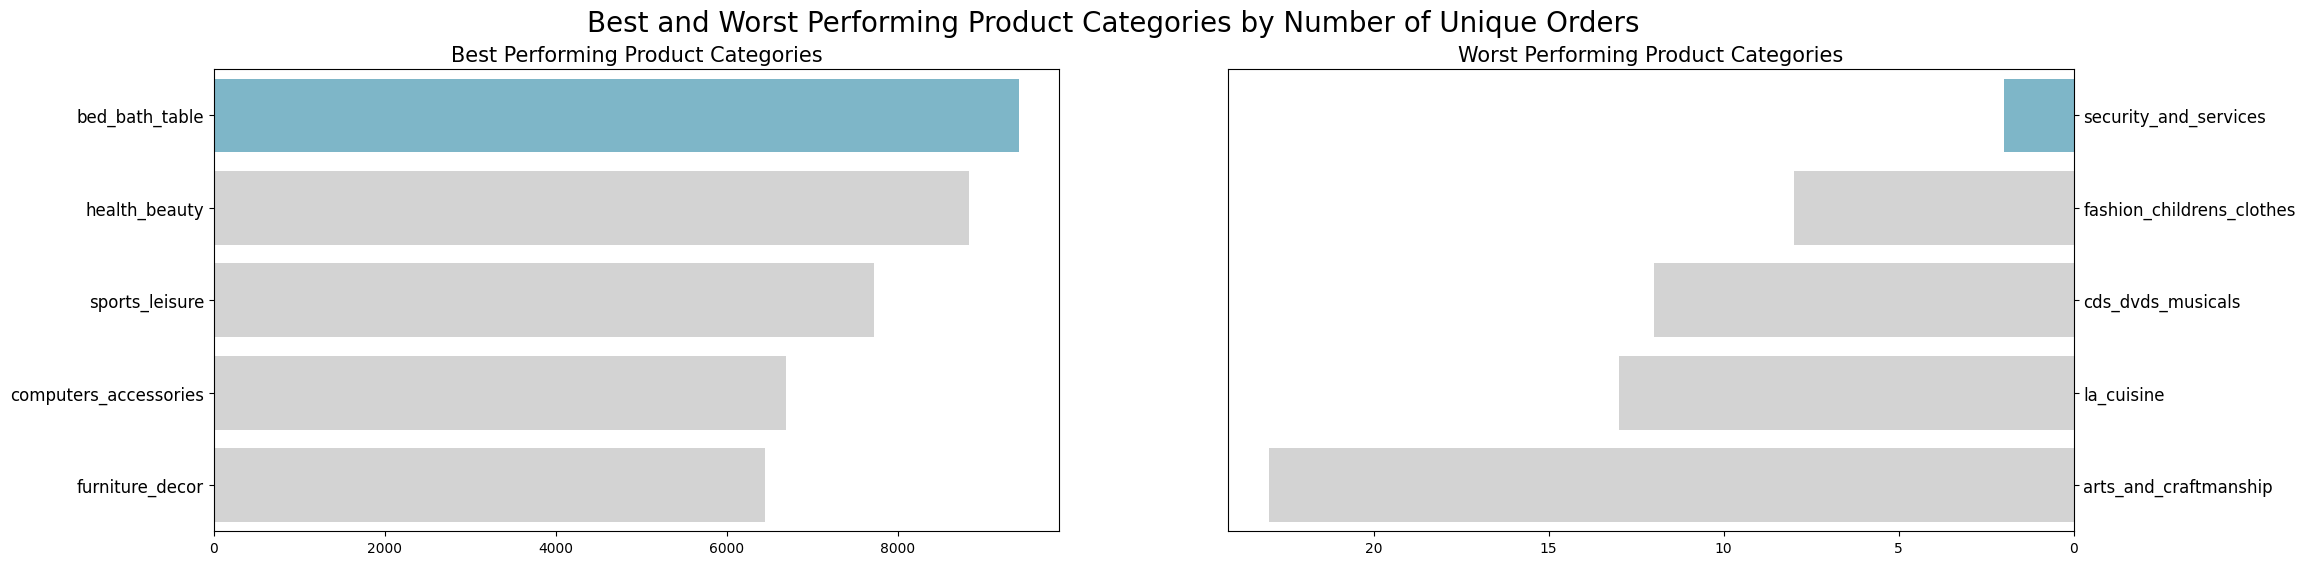

In [101]:
sum_order_items_df = order_items_products_df.groupby(by="product_category_name").agg({
    "order_id": "nunique",
}).sort_values(by="order_id", ascending=False)

# Membuat bar chart
# Ambil 5 kategori teratas dan terbawah berdasarkan jumlah unik order_id
top_5_categories = sum_order_items_df.head(5)
bottom_5_categories = sum_order_items_df.tail(5)

# Membuat 2 kanvas bersebelahan untuk menampilkan 2 chart sekaligus
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Bar chart kategori produk teratas
sns.barplot(x="order_id", y="product_category_name", data=top_5_categories, palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product Categories", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

# Bar chart kategori produk terbawah
sns.barplot(x="order_id", y="product_category_name", data=bottom_5_categories.sort_values(by="order_id", ascending=True), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product Categories", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product Categories by Number of Unique Orders", fontsize=20)
plt.show()

### Pertanyaan 2, 3, dan 4: Analisis Lanjutan 'RFM'

In [110]:
# 2) Kapan terakhir pelanggan melakukan transaksi?
# 3) Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
# 4) Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

# Gabung semua dataframe yang dianalisis
all_df = pd.merge(
    left=order_item_products_orders_df,
    right=customers_df,
    how="left",
    on="customer_id"
)

rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "price": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
 
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = all_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
 
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.sort_values(by="recency", ascending=True)

,customer_id,frequency,monetary,recency
29063,4b7decb9b58e2569548b8b4c8e20e8d7,1,145.00,0
76152,c4c66f47534e09a03fc7a878a9eda5ea,1,65.00,5
71469,b8c19e70d00f6927388e4f31c923d785,1,169.80,5
42327,6e353700bc7bcdf6ebc15d6de16d7002,1,45.90,5
33320,56b1ac2855cc6d7950b4ffa6a9b41b0d,1,109.90,5
...,...,...,...,...
42878,6f989332712d3222b6571b1cf5b835ce,1,36.49,700
68438,b106b360fe2ef8849fbbd056f777b4d5,1,100.00,701
51900,86dc2ffce2dfff336de2f386a786e574,1,134.97,718
40006,683c54fc24d40ee9f8a6fc179fd9856c,1,59.50,728


C:\Users\embez\AppData\Local\Temp\ipykernel_17820\4187587331.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\embez\AppData\Local\Temp\ipykernel_17820\4187587331.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\embez\AppData\Local\Temp\ipykernel_17820\4187587331.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False`

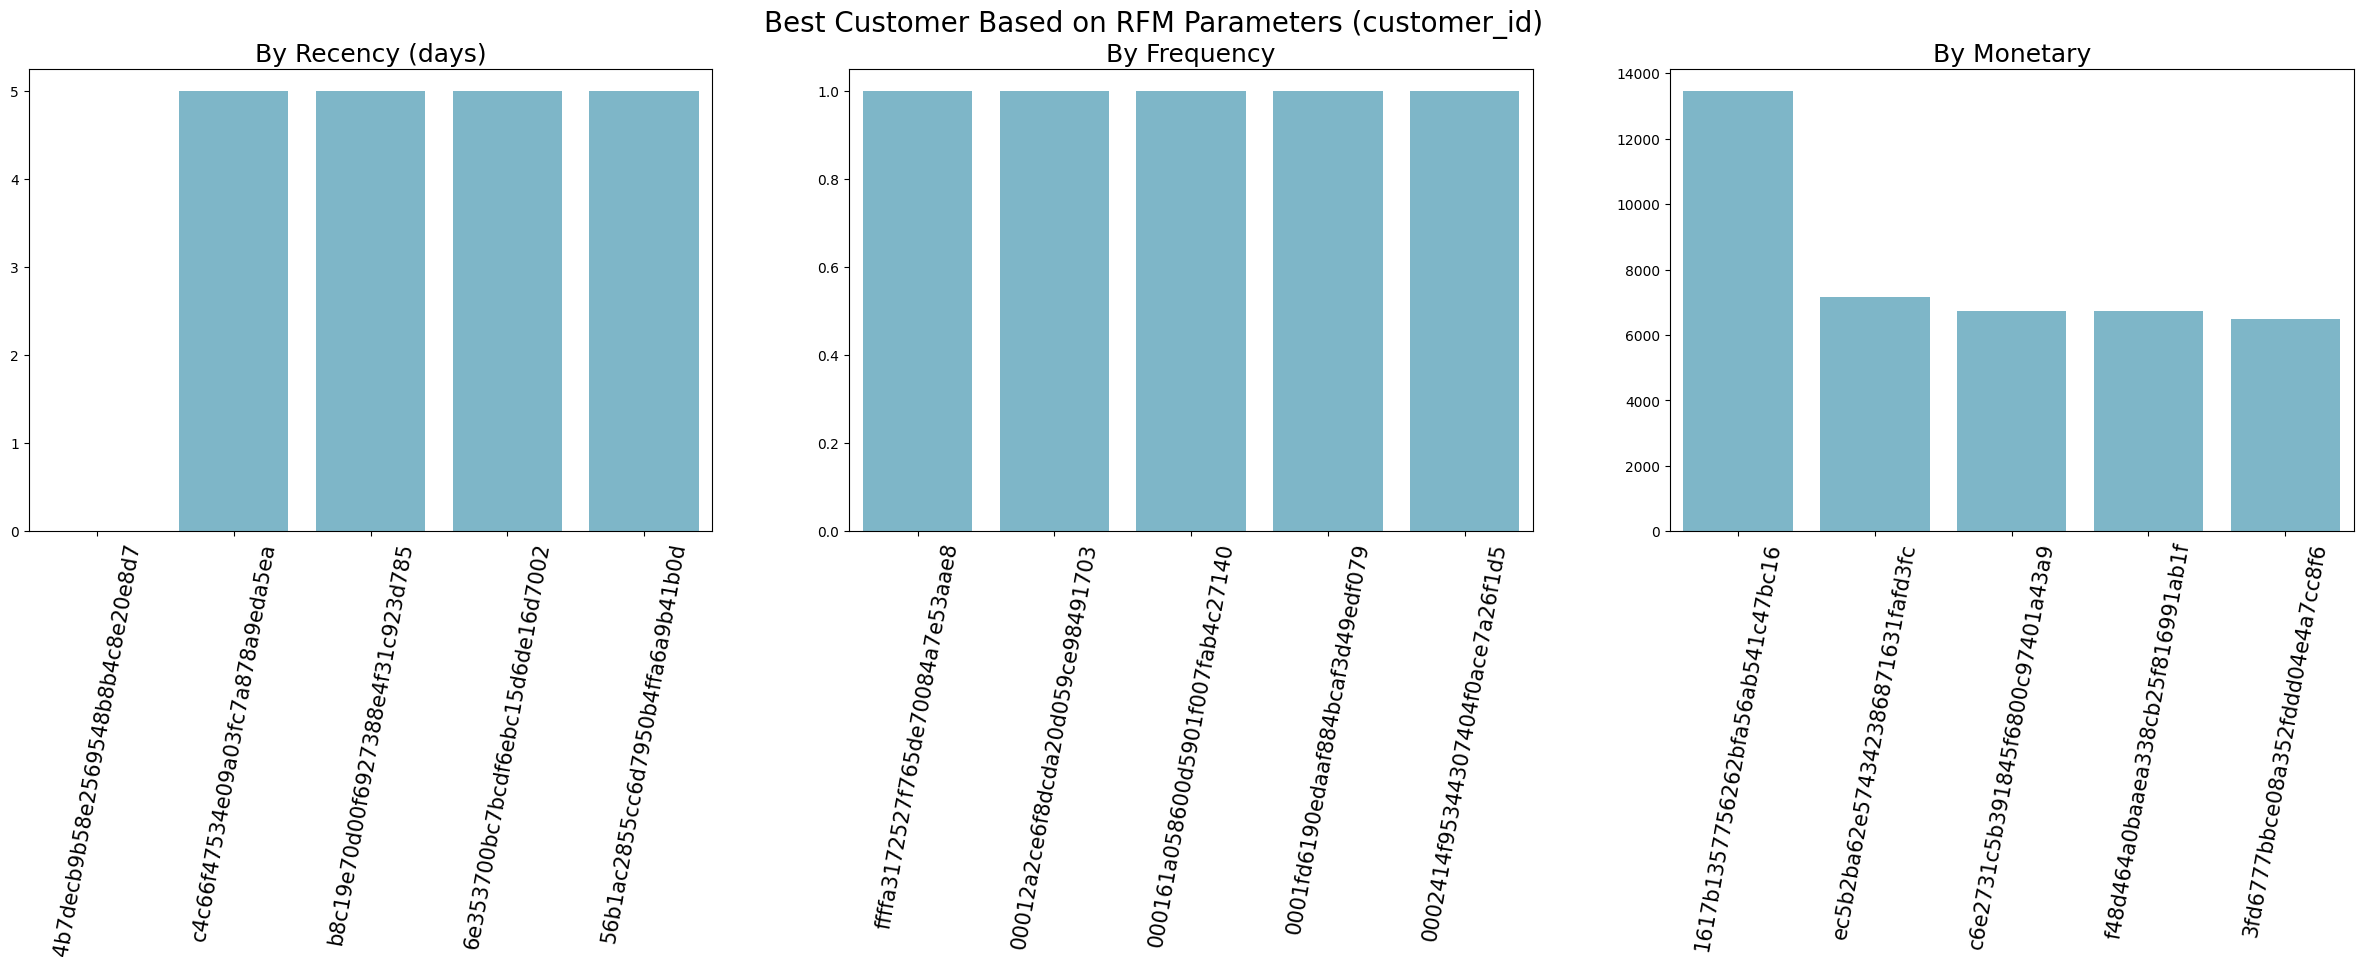

In [111]:
# Identifkasi Best Customer
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15, rotation=80)
sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15, rotation=80)
 
sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15, rotation=80)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

**Insight:**
- Dengan visualisasi data bisa dilihat jelas jawaban dari pertanyaan analisis yang ditentukan di awal.
- Visualisasi pertanyaan pertama dapat melihat kategori produk dengan penjualan terbanyak dan terdikit
- Visualisasi pertanyaan RFM ke-2, ke-3, dan ke-4 dapat melihat pelanggan terbaik berdasarkan ketiga parameter RFM tersebut.

## Conclusion

- Pertanyaan 1 dijawab dengan Bed-Bath-Table yang menjadi kategori produk dengan penjualan terbanyak dan Security & Services dengan kategori produk penjualan terdikit
- Pertanyaan 2 (Recency) best customer dipegang oleh customer_id "4b7decb9b58e2569548b8b4c8e20e8d7" dengan pembelian terakhir paling dekat yaitu 0 hari per-tanggal terakhir
- Pertanyaan 3 (Frequency) semua customer memiliki frequency yang sama yaitu 1x transaksi (berdasarkan dataset)
- Pertanyaan 4 (Moneter) best customer dipegang oleh customer_id "1617b1357756262bfa56ab541c47bc16" dengan pengeluaran terbanyak sebesar R$13440.0